<a href="https://colab.research.google.com/github/Nhatnguyen2001/AI_Exercise/blob/main/face_Recognition_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [ ]:
#drawing 
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

def plot_reg_history(history_fine):
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
#get data
with open('data.pickle', 'rb') as f:
  (x_train, y_train) = pickle.load(f)
# Reshape Data
x_pre = x_train[50] #dung de nhan dang

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)

# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 1)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
#tạo model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape = (67500,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Epoch 1/50
3/3 [==============================] - 1s 118ms/step - loss: 0.7025 - acc: 0.6000 - val_loss: 0.6903 - val_acc: 1.0000
Epoch 2/50
3/3 [==============================] - 0s 26ms/step - loss: 0.6895 - acc: 1.0000 - val_loss: 0.6873 - val_acc: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 25ms/step - loss: 0.6866 - acc: 1.0000 - val_loss: 0.6844 - val_acc: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 27ms/step - loss: 0.6836 - acc: 1.0000 - val_loss: 0.6813 - val_acc: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 25ms/step - loss: 0.6805 - acc: 1.0000 - val_loss: 0.6783 - val_acc: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 26ms/step - loss: 0.6774 - acc: 1.0000 - val_loss: 0.6751 - val_acc: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 25ms/step - loss: 0.6743 - acc: 1.0000 - val_loss: 0.6719 - val_acc: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 25ms/step - loss: 0.6709 - acc: 1.0000 - va

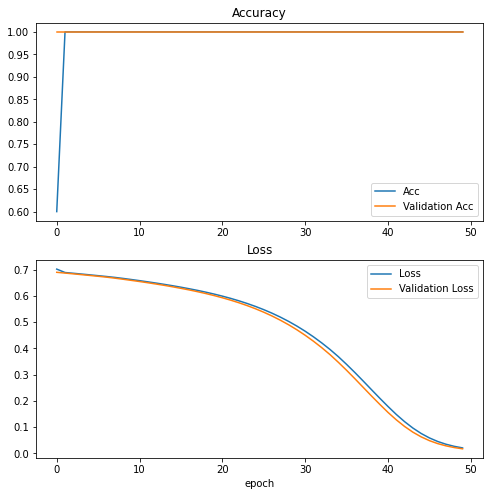

In [ ]:
model.compile(loss='binary_crossentropy', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.2)
plot_history(history)

(150, 150, 3)


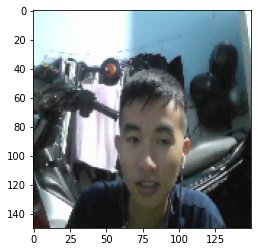

In [ ]:
# Load Test Image
plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB))
print(x_pre.shape)
img = x_pre.reshape(1,-1)
img = img.astype('float32')
img /= 255

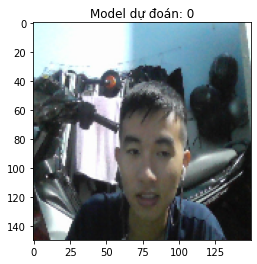

In [ ]:
#nhận dạng
plt.title("Model dự đoán: " + str(np.argmax(model.predict(img))))
plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

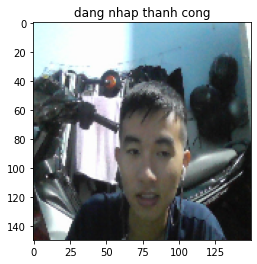

In [ ]:
dochinhxac = model.predict(img)[0][0]
if dochinhxac>0.8:
  plt.title("dang nhap thanh cong")
else:
  plt.title("dang nhap thanh cong")
plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

In [ ]:
#nhan dien thuc te
#load anh
img = cv2.imread('image.png')
#img = cv2.imread('90.jpg')
img = cv2.resize(img,(150,150))
img = img.reshape(-1,67500)
img = img.astype('float32')
img /= 255
#nhandang
dochinhxac = model.predict(img)[0][0]
print(dochinhxac)

[[0.6862745 0.7137255 0.7019608 ... 0.5176471 0.5568628 0.5411765]]
0.982887
